Epoch 0, Loss: 3.3377
Epoch 100, Loss: 0.6073
Epoch 200, Loss: 0.5305
Epoch 300, Loss: 0.4841
Epoch 400, Loss: 0.4516
Epoch 500, Loss: 0.4268
Epoch 600, Loss: 0.4067
Epoch 700, Loss: 0.3896
Epoch 800, Loss: 0.3747
Epoch 900, Loss: 0.3616
Final Log Loss: 0.3497


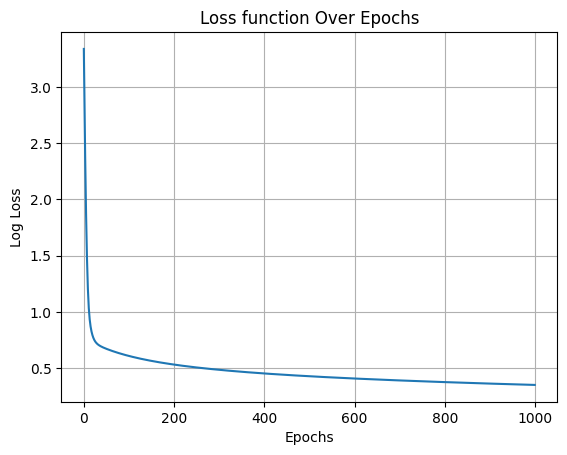

In [1]:
#Gradient Descent
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

num_classes = len(np.unique(y))
num_features = X.shape[1]
weights = np.random.randn(num_features, num_classes)
bias = np.zeros((1, num_classes))

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / exp_z.sum(axis=1, keepdims=True)

def log_loss(y_true, y_pred):
    y_true_one_hot = np.zeros_like(y_pred)
    y_true_one_hot[np.arange(len(y_true)), y_true] = 1
    return -np.mean(np.sum(y_true_one_hot * np.log(y_pred + 1e-15), axis=1))

learning_rate = 0.01
num_epochs = 1000
loss_values=[]

for epoch in range(num_epochs):
    z = X.dot(weights) + bias
    y_pred = softmax(z)
    loss = log_loss(y, y_pred)
    loss_values.append(loss)
    grad_weights = X.T.dot(y_pred - np.eye(num_classes)[y]) / X.shape[0]
    grad_bias = np.mean(y_pred - np.eye(num_classes)[y], axis=0, keepdims=True)
    weights -= learning_rate * grad_weights
    bias -= learning_rate * grad_bias
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

final_z = X.dot(weights) + bias
final_pred = softmax(final_z)
final_loss = log_loss(y, final_pred)
print(f'Final Log Loss: {final_loss:.4f}')

plt.plot(range(num_epochs),loss_values)
plt.title("Loss function Over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.grid()
plt.show()

Epoch 0, Loss: 0.4305
Epoch 100, Loss: 0.1140
Epoch 200, Loss: 0.0924
Epoch 300, Loss: 0.0788
Epoch 400, Loss: 0.0697
Epoch 500, Loss: 0.0828
Epoch 600, Loss: 0.0641
Epoch 700, Loss: 0.0695
Epoch 800, Loss: 0.0594
Epoch 900, Loss: 0.0588
Final Log Loss: 0.0576


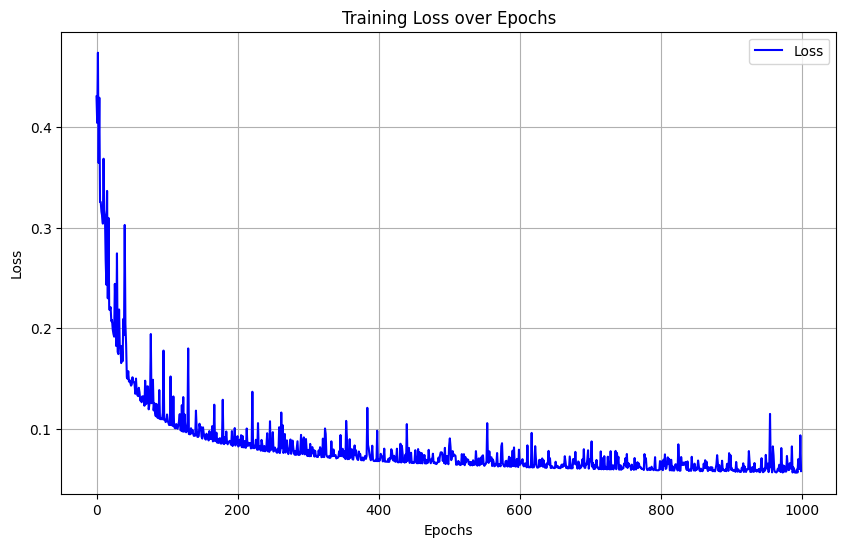

In [2]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target
num_classes = len(np.unique(y))
num_features = X.shape[1]
weights = np.random.randn(num_features, num_classes)
bias = np.zeros((1, num_classes))

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / exp_z.sum(axis=1, keepdims=True)

def log_loss(y_true, y_pred):
    y_true_one_hot = np.zeros_like(y_pred)
    y_true_one_hot[np.arange(len(y_true)), y_true] = 1
    return -np.mean(np.sum(y_true_one_hot * np.log(y_pred + 1e-15), axis=1))

learning_rate = 0.01
num_epochs = 1000
num_samples = X.shape[0]
losses = []

for epoch in range(num_epochs):
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    for i in indices:
        z = X[i].dot(weights) + bias
        y_pred = softmax(z.reshape(1, -1))
        loss = log_loss(y[i:i+1], y_pred)

        grad_weights = X[i].reshape(-1, 1).dot((y_pred - np.eye(num_classes)[y[i]]).reshape(1, -1))
        grad_bias = y_pred - np.eye(num_classes)[y[i]].reshape(1, -1)

        weights -= learning_rate * grad_weights
        bias -= learning_rate * grad_bias

    epoch_loss = log_loss(y, softmax(X.dot(weights) + bias))
    losses.append(epoch_loss)
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {epoch_loss:.4f}')

final_z = X.dot(weights) + bias
final_pred = softmax(final_z)
final_loss = log_loss(y, final_pred)
print(f'Final Log Loss: {final_loss:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(losses, label='Loss', color='blue')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()